In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline
rcParams['figure.figsize'] = 8, 4
sb.set_style('whitegrid')

In [2]:
df = pd.read_csv("Poke_log.csv")
print(df.columns)

Index(['Tier', 'My Team/Pokemon Revealed', 'Opponent's Team/Pokemon Revealed',
       'Win/Loss', 'Own Pokemon Down', 'Opponent Pokemon Down', 'Moves used',
       'Super effective', 'Not very effective', 'Total Moves',
       'Attacking Moves', 'Status Moves', 'Turns', 'Rank'],
      dtype='object')


In [18]:
#Stats separated by tiers and win/loss
turns = df.groupby(["Tier", "Win/Loss"]).mean()["Turns"]
print(turns)

Tier                           Win/Loss
[Gen 7] NU                     Loss        23.000000
                               Win         21.000000
[Gen 7] PU                     Loss        25.000000
                               Win         15.846154
[Gen 7] RU                     Loss        16.000000
                               Win         19.285714
[Gen 7] Random Battle          Loss        19.000000
                               Win         17.903226
[Gen 7] UU                     Win         17.000000
[Gen 7] Unrated Random Battle  Loss        21.444444
                               Win         20.514286
Name: Turns, dtype: float64


Text(0, 0.5, 'Turns')

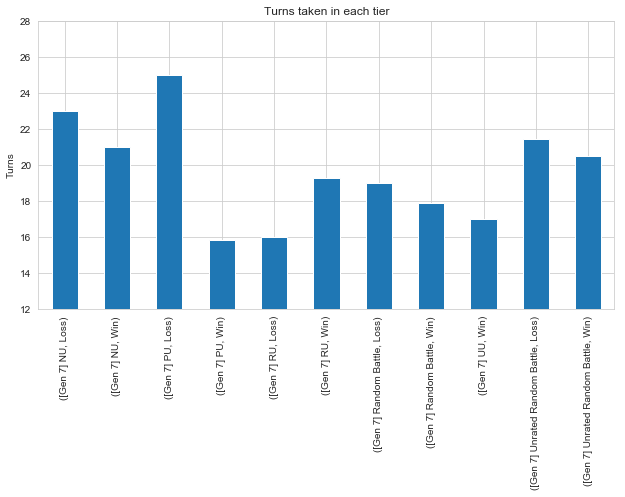

In [25]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
turns.plot(kind='bar')

ax.set_title('Turns taken in each tier')
ax.set_xticks(range(len(turns)))
ax.set_ylim([12,28])
#ax.set_xticklabels(["NU Loss", "NU Win", "PU Loss", "PU Win", "RU Loss", "RU Win"], rotation=60, fontsize='medium')
ax.set_xlabel('')
ax.set_ylabel('Turns')

In [27]:
#Grabs pokemon used by myself and oppoenent
myteamlist = []
for team in df['My Team/Pokemon Revealed']:
    pokes = team.split("|")
    for poke in pokes:
        myteamlist.append(poke)

myteamdict={x:myteamlist.count(x) for x in myteamlist}

opteamlist = []
for team in df["Opponent's Team/Pokemon Revealed"]:
    pokes = team.split("|")
    for poke in pokes:
        opteamlist.append(poke)

opteamdict={x:opteamlist.count(x) for x in opteamlist}

In [28]:
#Gives a total count of each pokemon that's been used so far
total_dict = {"mine":myteamdict, "opponent":opteamdict}
newdf = pd.DataFrame(total_dict, dtype=int)
newdf.mean()

mine        2.897375
opponent    2.946903
dtype: float64